<a href="https://colab.research.google.com/github/GiulioAppetito/Progetto-AMOD-21-22/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [4]:
def dataframes(url):
  df = pd.read_csv(url)
  df = df.sort_values(by = ['jobs'])

  dfClose = df[df['releaseTimes']=='releasesCloseToZero']
  dfFar = df[df['releaseTimes']=='releasesFarFromZero']
  dfLow = df[df['releaseTimes']=='releasesLowVariance']
  dfUniform = df[df['releaseTimes']=='releasesUniform']
  dfHigh = df[df['releaseTimes']=='releasesHighVariance']

  # releases - processing 
  dfCloseLow = dfClose[dfClose['processingTimes']=='processingLowVariance']
  dfCloseUniform = dfClose[dfClose['processingTimes']=='processingUniform']
  dfCloseHigh = dfClose[dfClose['processingTimes']=='processingHighVariance']

  dfFarLow = dfFar[dfFar['processingTimes']=='processingLowVariance']
  dfFarUniform = dfFar[dfFar['processingTimes']=='processingUniform']
  dfFarHigh = dfFar[dfFar['processingTimes']=='processingHighVariance']

  dfLowLow = dfLow[dfLow['processingTimes']=='processingLowVariance']
  dfLowUniform = dfLow[dfLow['processingTimes']=='processingUniform']
  dfLowHigh = dfLow[dfLow['processingTimes']=='processingHighVariance']

  dfUniformLow = dfUniform[dfUniform['processingTimes']=='processingLowVariance']
  dfUniformUniform = dfUniform[dfUniform['processingTimes']=='processingUniform']
  dfUniformHigh = dfUniform[dfUniform['processingTimes']=='processingHighVariance']

  dfHighLow = dfHigh[dfHigh['processingTimes']=='processingLowVariance']
  dfHighUniform = dfHigh[dfHigh['processingTimes']=='processingUniform']
  dfHighHigh = dfHigh[dfHigh['processingTimes']=='processingHighVariance']

  dfs = [dfCloseLow,dfCloseUniform,dfCloseHigh,dfFarLow,dfFarUniform,dfFarHigh,dfLowLow,dfLowUniform,dfLowHigh,dfUniformLow,dfUniformUniform,dfUniformHigh,dfHighLow,dfHighUniform,dfHighHigh]
  return dfs


In [5]:
dfs = dataframes('https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results_60.0_sec.csv')
labels = ['dfCloseLow','dfCloseUniform','dfCloseHigh','dfFarLow','dfFarUniform','dfFarHigh','dfLowLow','dfLowUniform','dfLowHigh','dfUniformLow','dfUniformUniform','dfUniformHigh','dfHighLow','dfHighUniform','dfHighHigh']

In [13]:
def graficoTempo(title, dframe,limit):
  intervals1 = []
  sample_means1 = []
  x = []
  y_gurobi = []
  y_bnb = []

  gurobiColor =  "#1a759f"
  bnbColor ="#fb8500"
  limitColor = "#f21b3f"

  df = dframe
  df = df.drop_duplicates(subset=['jobs'], keep='last')

  for i in df.index:
    x.append(df.loc[i,"jobs"])
    y_gurobi.append(df.loc[i,"gurobiTime"])
    y_bnb.append(df.loc[i,"bnbTime"])
  
  # plotting graph
  fig, ax = plt.subplots(1,figsize=(20,10))
  #fig.suptitle('Vertically stacked subplots')

  ax.plot(x, y_gurobi, label = "Gurobi", color = gurobiColor)
  ax.errorbar(x, y_gurobi, fmt ='o')
  ax.set_title(title)
  ax.set_xlabel('jobs')
  ax.set_ylabel('sec')
  ax.set_xlim(min(df['jobs']), max(df['jobs']))
  plt.xticks(range(min(df['jobs']), max(df['jobs']),1))


  ax.plot(x, y_bnb, label = "Branch & Bound",color = bnbColor)
  ax.errorbar(x, y_bnb, fmt ='o')
  ax.axhline(y = limit, label='Time limit',color = limitColor)

  plt.legend(loc="upper left")

  #ax.set_title('k = 64')

In [ ]:
url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pUniform",df,60)

In [ ]:
url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pUniform",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pHighVariance",df,60)

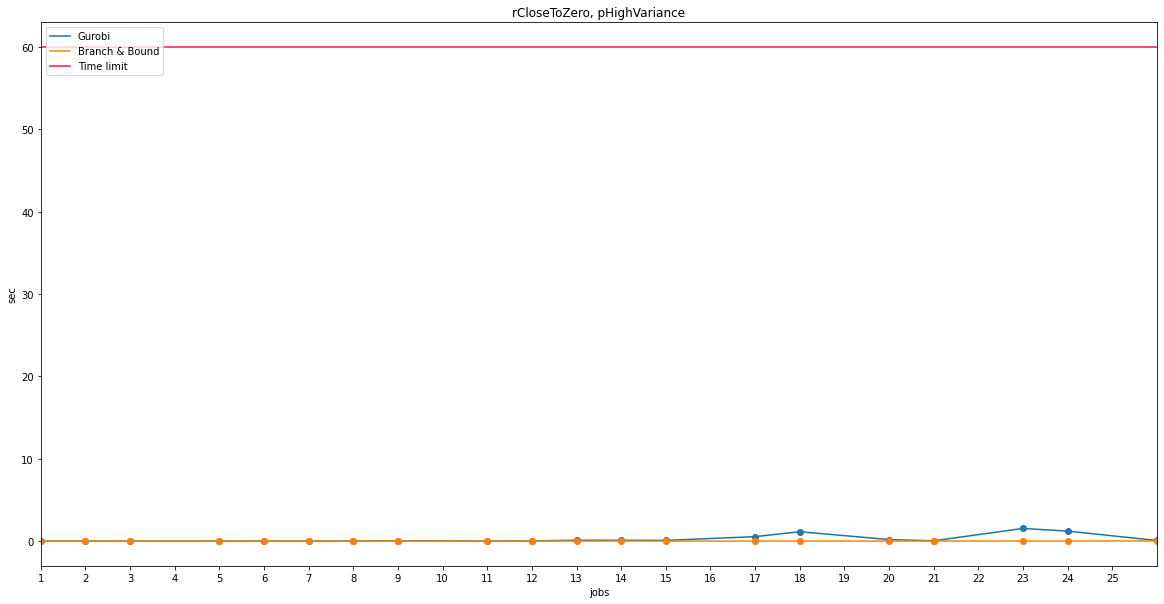

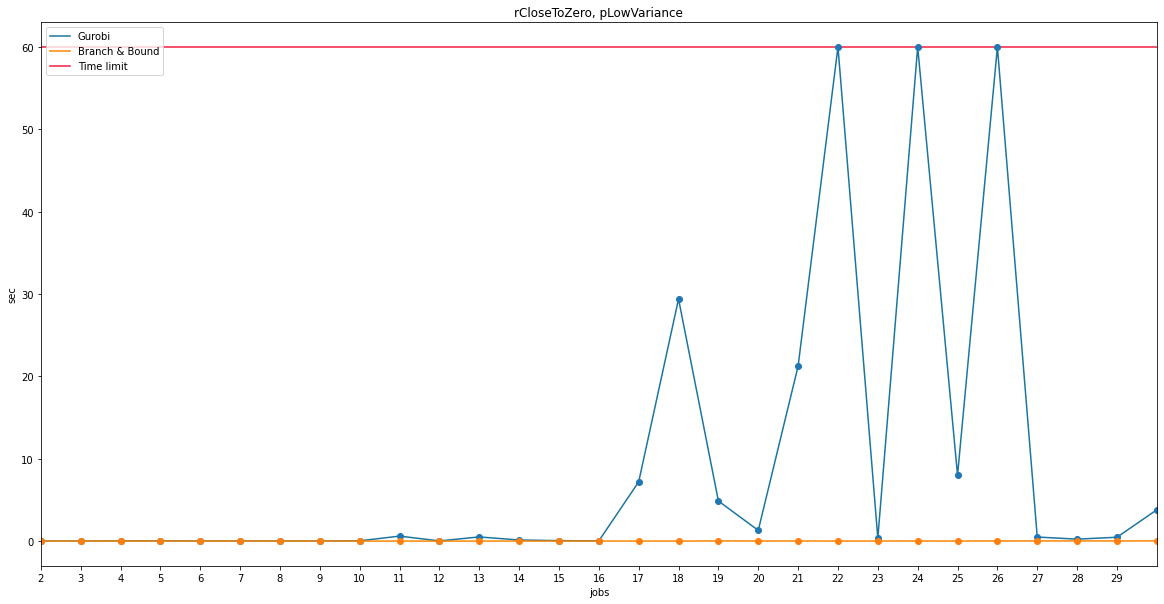

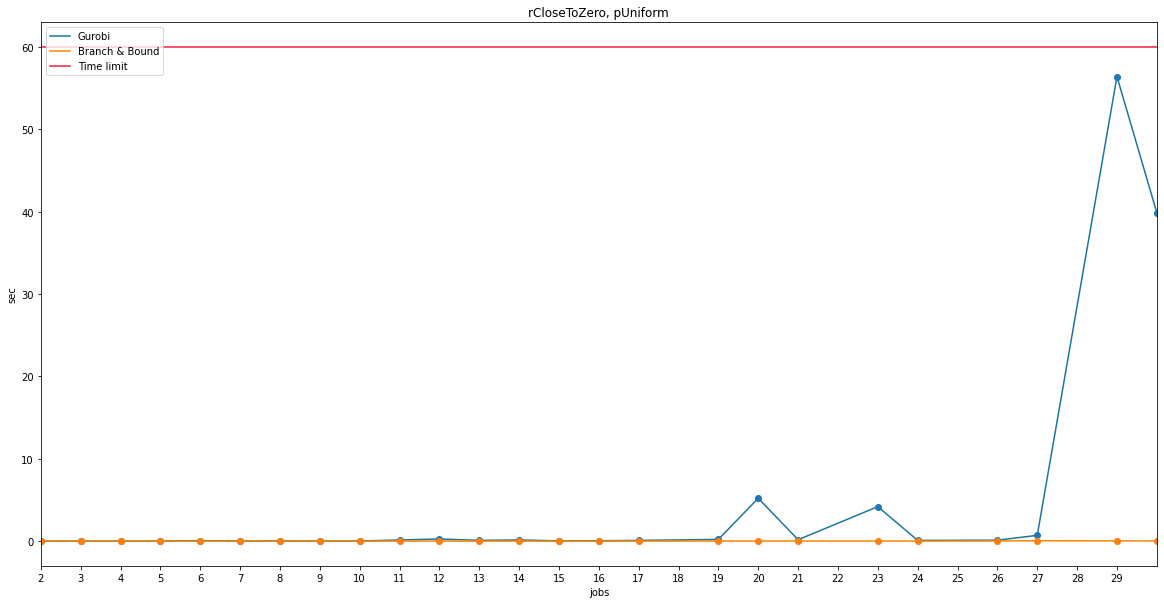

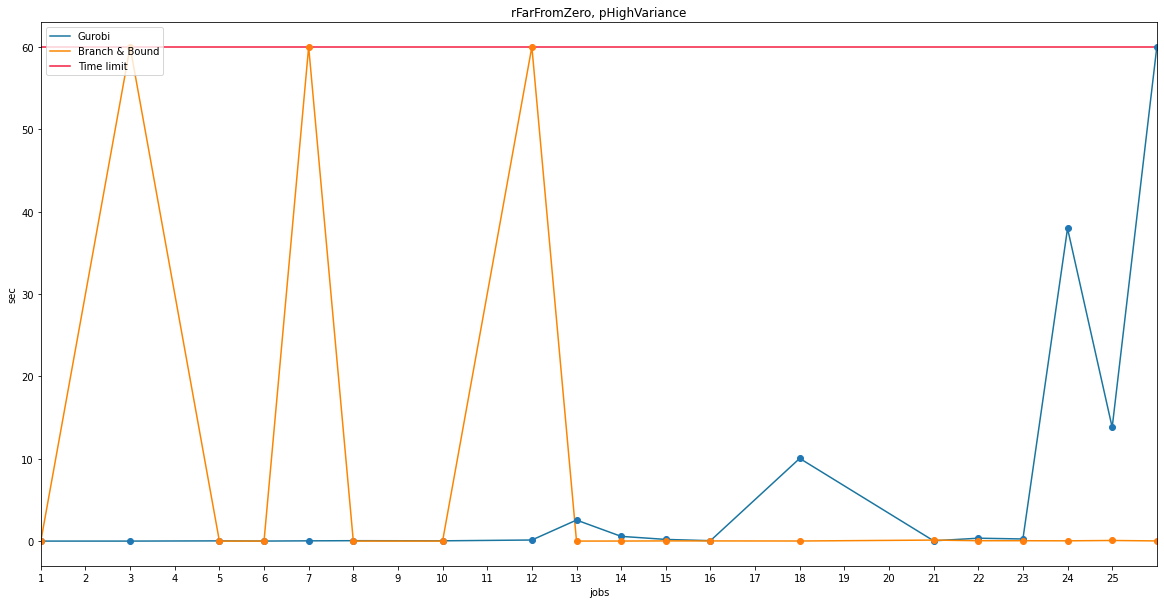

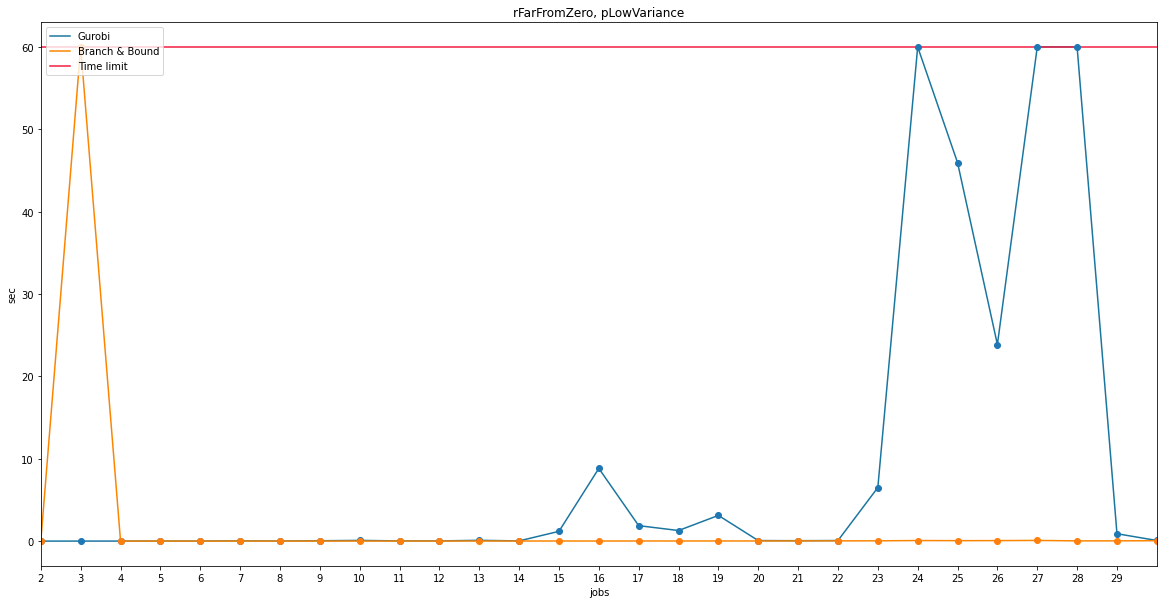

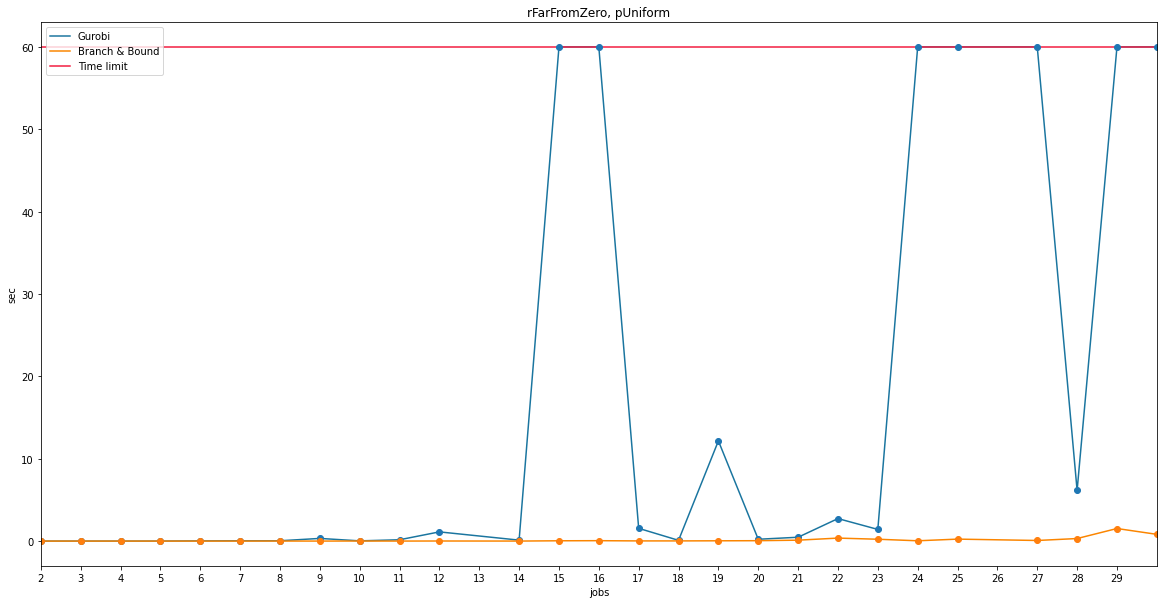

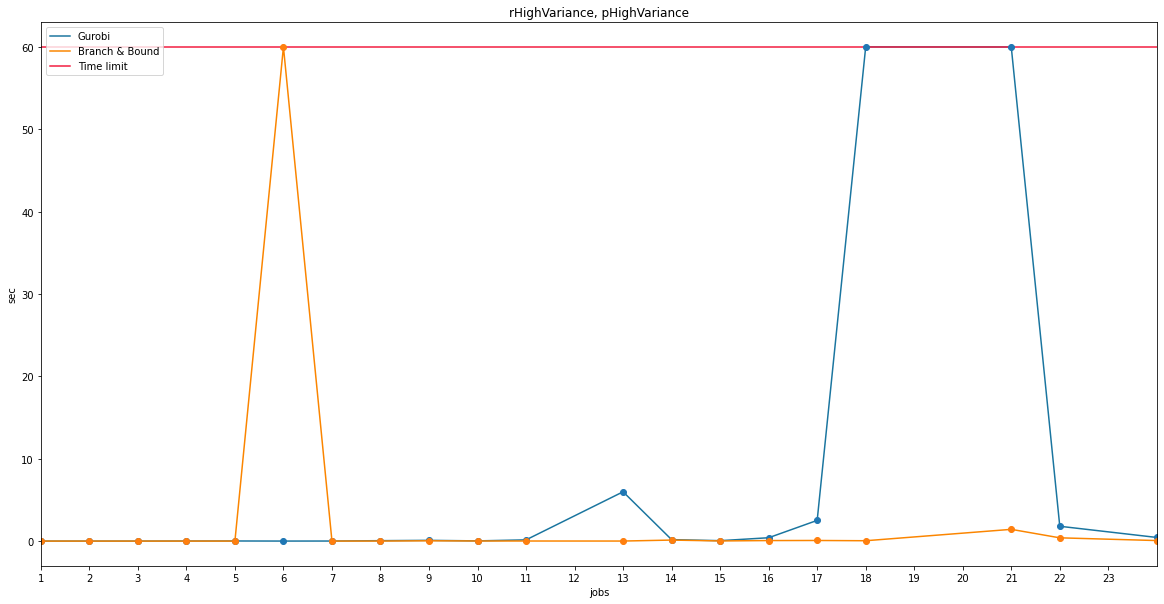

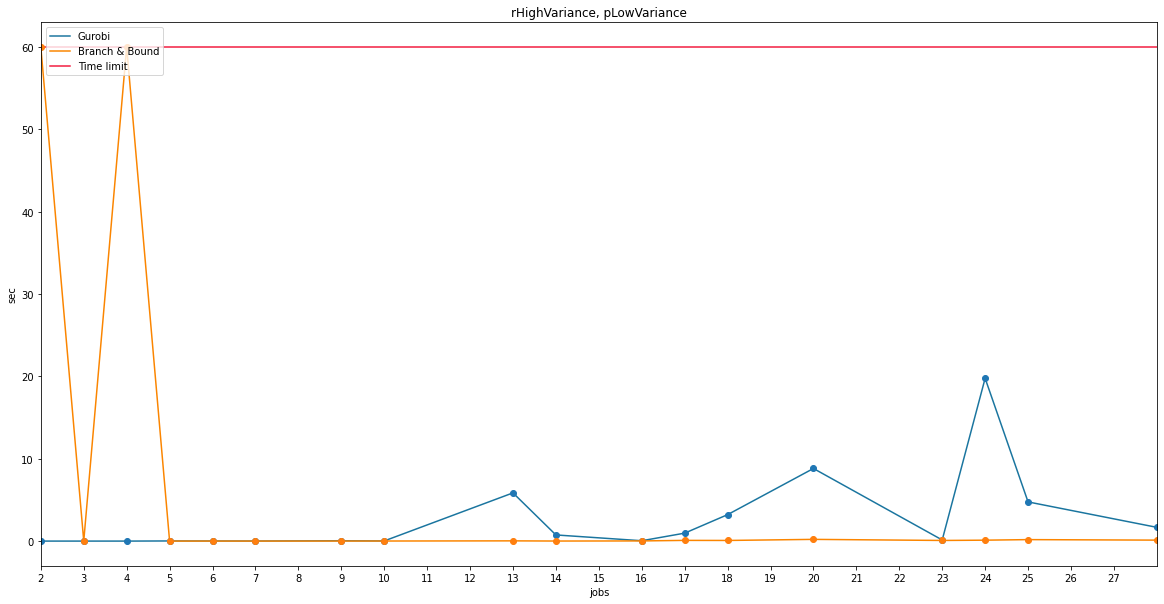

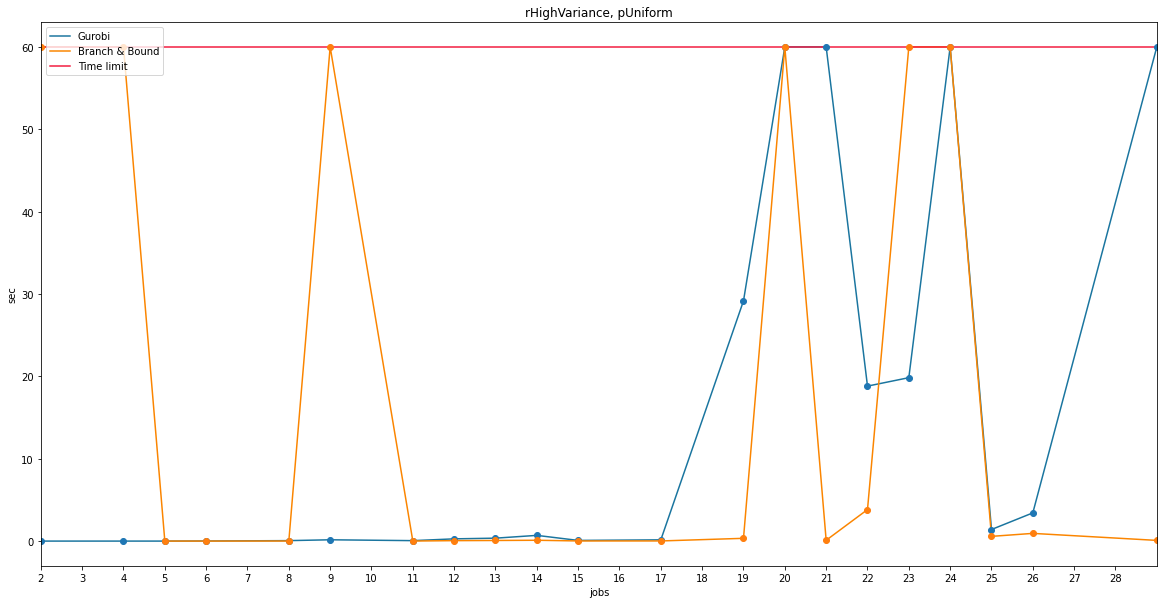

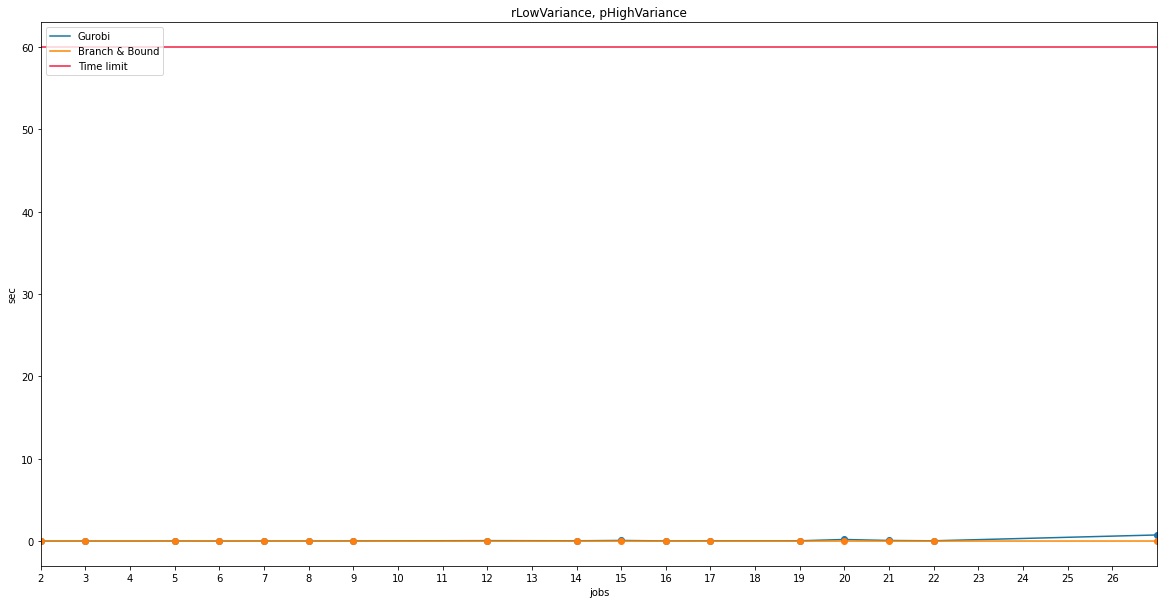

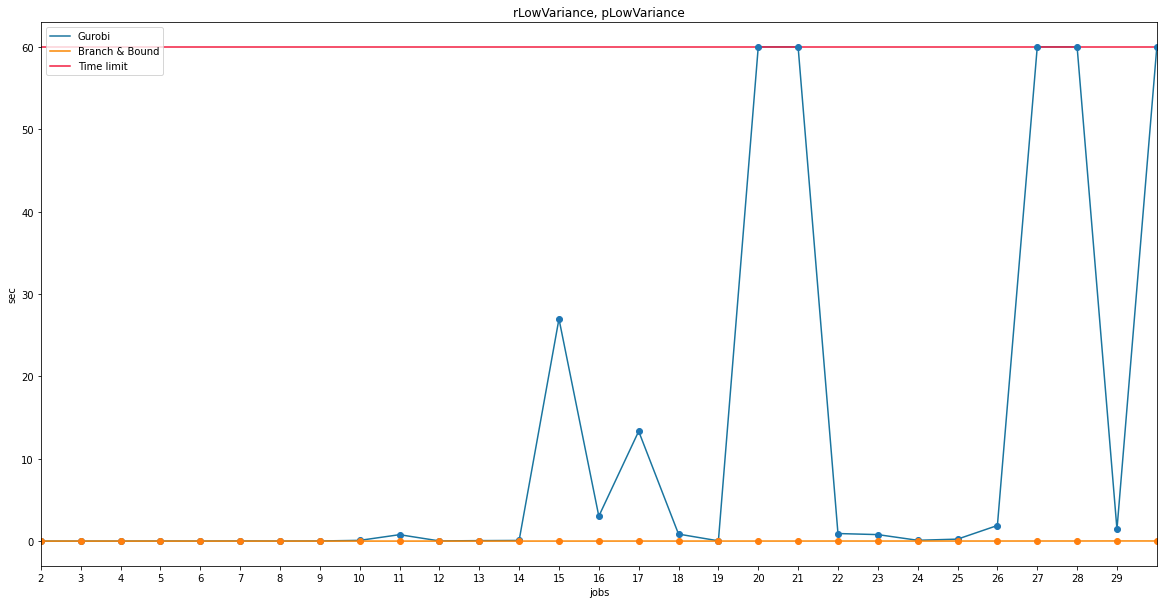

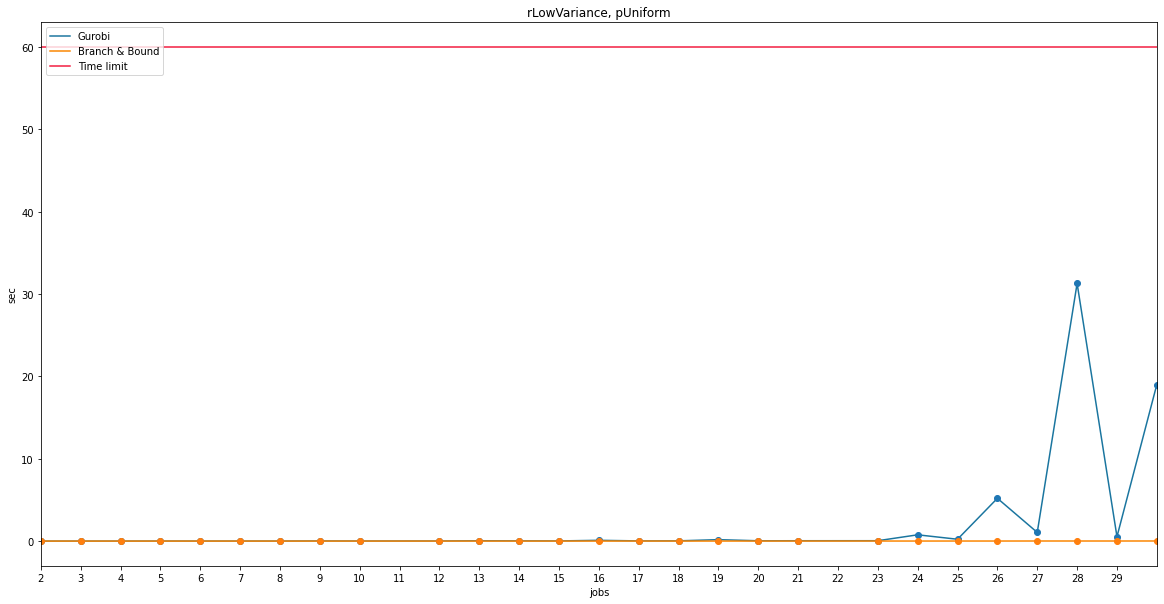

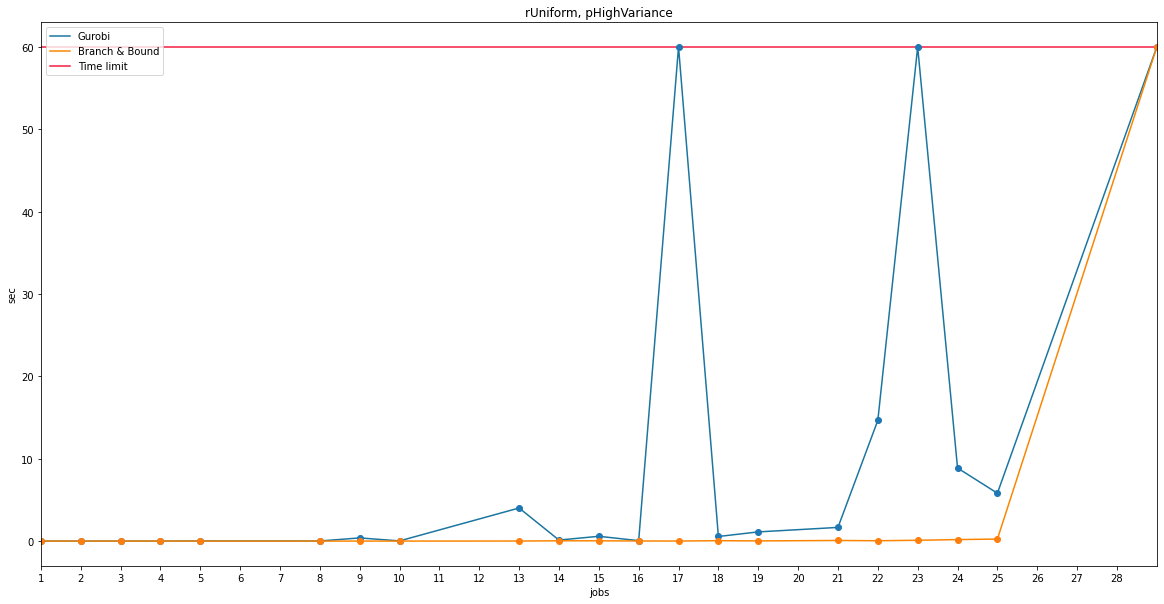

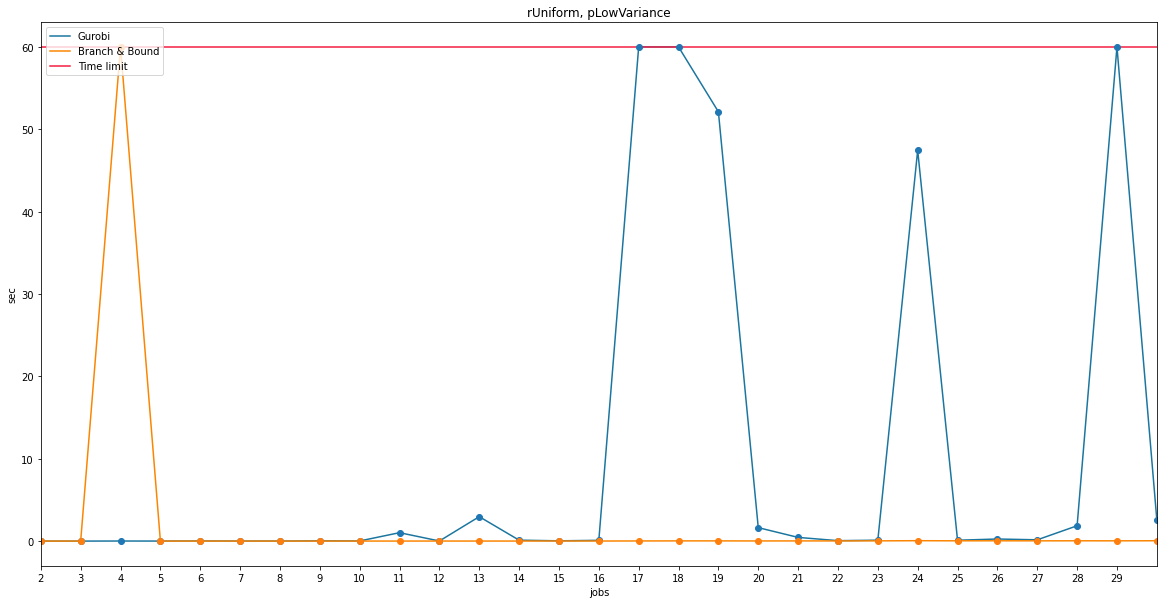

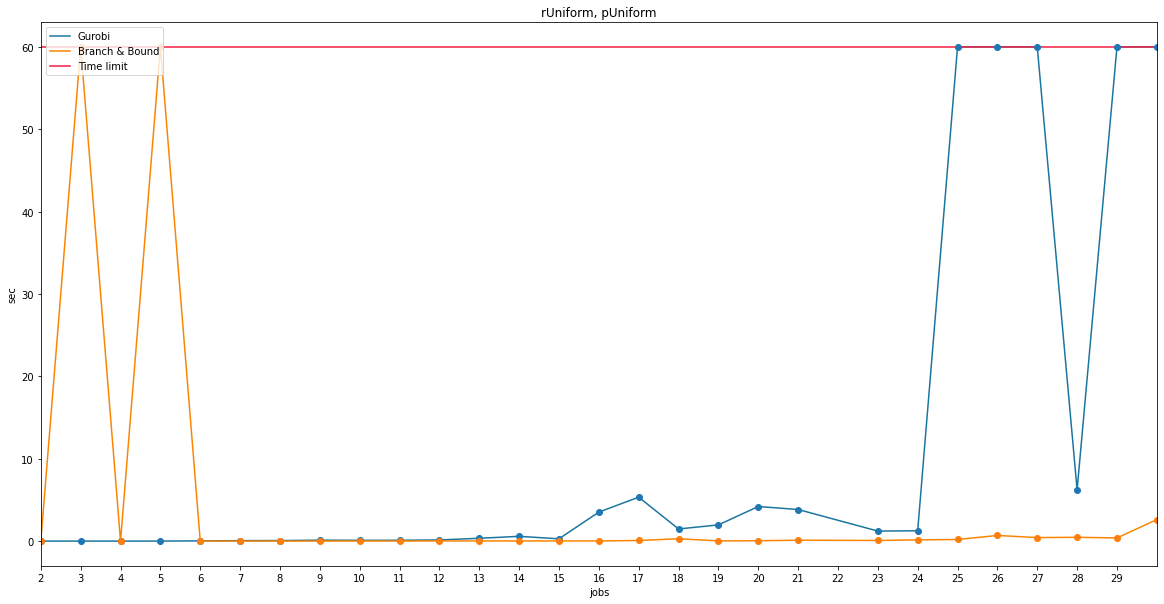

In [14]:
url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesCloseToZero_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rCloseToZero, pUniform",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesFarFromZero_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rFarFromZero, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesFarFromZero_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rFarFromZero, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesFarFromZero_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rFarFromZero, pUniform",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesHighVariance_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rHighVariance, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesHighVariance_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rHighVariance, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesHighVariance_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rHighVariance, pUniform",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesLowVariance_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rLowVariance, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesLowVariance_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rLowVariance, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesLowVariance_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rLowVariance, pUniform",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesUniform_processingHighVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rUniform, pHighVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesUniform_processingLowVariance_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rUniform, pLowVariance",df,60)

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-AMOD-21-22/master/results_releasesUniform_processingUniform_60.0_sec.csv'
df = pd.read_csv(url)
df = df.sort_values(by = ['jobs'])
graficoTempo("rUniform, pUniform",df,60)

In [ ]:
i = 0
for df in dfs:
  graficoTempo(labels[i],df,60)
  i += 1
print(i)

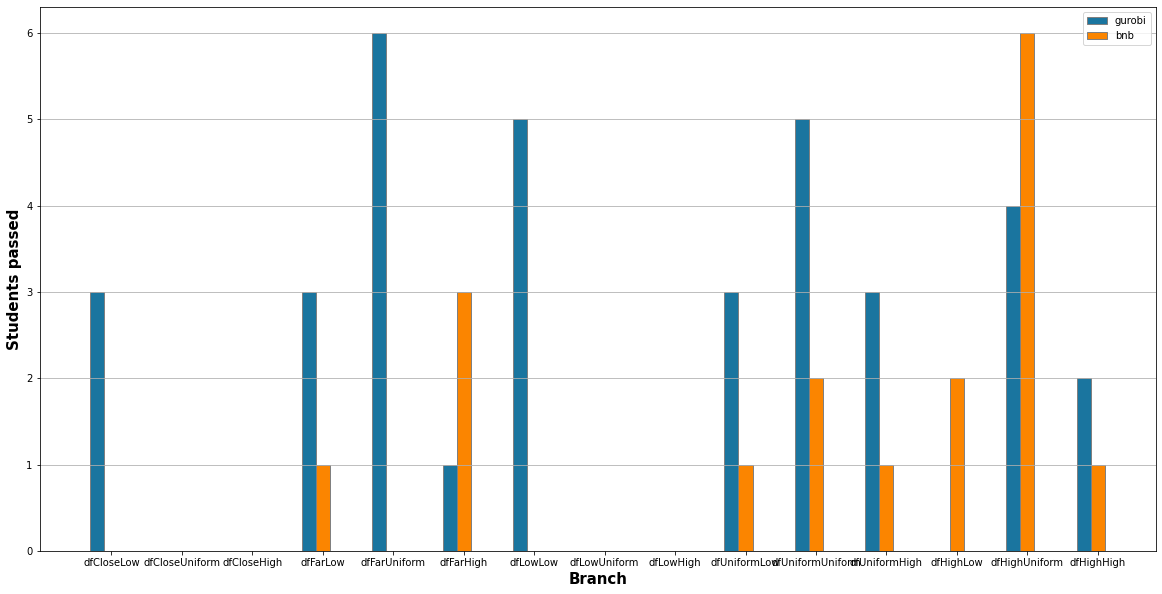

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(20, 10))
 
# set height of bar
gurobi = [3,0,0,3,6,1,5,0,0,3,5,3,0,4,2]
bnb =    [0,0,0,1,0,3,0,0,0,1,2,1,2,6,1]

 
# Set position of bar on X axis
br1 = np.arange(len(gurobi))
br2 = [x + barWidth for x in br1]
gurobiColor =  "#1a759f"
bnbColor ="#fb8500"
limitColor = "#f21b3f"
 
# Make the plot
plt.bar(br1, gurobi, color =gurobiColor, width = barWidth,
        edgecolor ='grey', label ='gurobi')
plt.bar(br2, bnb, color =bnbColor, width = barWidth,
        edgecolor ='grey', label ='bnb')

labels = ['dfCloseLow','dfCloseUniform','dfCloseHigh','dfFarLow','dfFarUniform','dfFarHigh','dfLowLow','dfLowUniform','dfLowHigh','dfUniformLow','dfUniformUniform','dfUniformHigh','dfHighLow','dfHighUniform','dfHighHigh']
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(gurobi))],labels
        )
plt.grid(axis='y')
 
plt.legend()
plt.show()